In [1]:
import pandas as pd

In [36]:

raw_texto_categoria_productos = pd.read_csv('../datasets/raw/ProductCategoryText.csv')
raw_productos = pd.read_csv('../datasets/raw/Products.csv')
raw_texto_productos = pd.read_csv('../datasets/raw/ProductTexts.csv')
raw_orden_ventas_item = pd.read_csv('../datasets/raw/SalesOrderItems.csv')

In [38]:
def eda(df, nombre, id='id'):
    print(f'EDA de {nombre} \n')
    print('Primeras filas:')
    print(df.head())
    print()
    
    print(df.info())
    print()

    print('Filas enteras repeditas:', df.duplicated().sum())
    print()

    print('Filas con id repetido:', df.duplicated(id).sum())
    print()

    print('Valores ausentes:')
    print(df.isna().sum())
    print()

## Ordenes de Venta por Item

In [39]:
eda(raw_orden_ventas_item, "raw_orden_ventas_item", "PRODUCTID")

EDA de raw_orden_ventas_item 

Primeras filas:
   SALESORDERID  SALESORDERITEM PRODUCTID NOTEID CURRENCY  GROSSAMOUNT  \
0     500000000              10   MB-1034             USD         2499   
1     500000000              20   CB-1161             USD          399   
2     500000001              10   HB-1175             USD          899   
3     500000001              20   RC-1056             USD         2499   
4     500000001              30   CC-1021             USD         1144   

   NETAMOUNT  TAXAMOUNT ITEMATPSTATUS  OPITEMPOS  QUANTITY QUANTITYUNIT  \
0   2186.625    312.375             I        NaN         4           EA   
1    349.125     49.875             I        NaN         9           EA   
2    786.625    112.375             I        NaN         2           EA   
3   2186.625    312.375             I        NaN         2           EA   
4   1001.000    143.000             I        NaN         3           EA   

   DELIVERYDATE  
0      20180311  
1      20180311  
2  

In [40]:
# 1. Convertir DELIVERYDATE a tipo datetime
raw_orden_ventas_item['DELIVERYDATE'] = pd.to_datetime(raw_orden_ventas_item['DELIVERYDATE'], format='%Y%m%d', errors='coerce')



In [41]:
columnas_a_eliminar = [
    'QUANTITYUNIT',
    'NOTEID',
    'TAXAMOUNT',
    'ITEMATPSTATUS',
    'SALESORDERID',
    'SALESORDERITEM',
    'CURRENCY',
    'NETAMOUNT',
    'OPITEMPOS'
]

raw_orden_ventas_item.drop(columns=[col for col in columnas_a_eliminar if col in raw_orden_ventas_item.columns], inplace=True)



In [42]:
# 3. Eliminar filas con nulos en columnas críticas
raw_orden_ventas_item.dropna(subset=['QUANTITY', 'DELIVERYDATE', 'PRODUCTID', 'GROSSAMOUNT'], inplace=True)


In [43]:

# 4. Redondear valores monetarios y convertir QUANTITY a entero
raw_orden_ventas_item['GROSSAMOUNT'] = raw_orden_ventas_item['GROSSAMOUNT'].astype(int)
raw_orden_ventas_item['QUANTITY'] = raw_orden_ventas_item['QUANTITY'].astype(int)




In [44]:
# 5. Detección y eliminación de outliers en QUANTITY
Q1 = raw_orden_ventas_item['QUANTITY'].quantile(0.25)
Q3 = raw_orden_ventas_item['QUANTITY'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

raw_orden_ventas_item = raw_orden_ventas_item[
    (raw_orden_ventas_item['QUANTITY'] >= limite_inferior) &
    (raw_orden_ventas_item['QUANTITY'] <= limite_superior)
]



In [45]:
# 6. Renombrar GROSSAMOUNT a PRICE_UNITARIO para reflejar su verdadero significado
raw_orden_ventas_item.rename(columns={'GROSSAMOUNT': 'PRICE_UNITARIO'}, inplace=True)

In [46]:
print(raw_orden_ventas_item)

     PRODUCTID  PRICE_UNITARIO  QUANTITY DELIVERYDATE
0      MB-1034            2499         4   2018-03-11
1      CB-1161             399         9   2018-03-11
2      HB-1175             899         2   2018-02-28
3      RC-1056            2499         2   2018-02-28
4      CC-1021            1144         3   2018-02-28
...        ...             ...       ...          ...
1925   MB-1031             649        10   2019-07-09
1926   BX-1013             449         3   2019-07-09
1927   EB-1132            1900         3   2019-07-09
1928   BX-1011             249         5   2019-07-09
1929   BX-1015             299         6   2019-07-09

[1908 rows x 4 columns]


## Text Category Products


In [19]:
eda(raw_texto_categoria_productos, "raw_texto_categoria_productos", "PRODCATEGORYID")

EDA de raw_texto_categoria_productos 

Primeras filas:
  PRODCATEGORYID LANGUAGE       SHORT_DESCR  MEDIUM_DESCR  LONG_DESCR
0             RO       EN         Road Bike           NaN         NaN
1             BX       EN               BMX           NaN         NaN
2             CC       EN  Cyclo-cross Bike           NaN         NaN
3             MB       EN     Mountain Bike           NaN         NaN
4             RC       EN       Racing Bike           NaN         NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PRODCATEGORYID  9 non-null      object 
 1   LANGUAGE        9 non-null      object 
 2   SHORT_DESCR     9 non-null      object 
 3   MEDIUM_DESCR    0 non-null      float64
 4   LONG_DESCR      0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 492.0+ bytes
None

Filas enteras repeditas: 0

Filas con id repet

Esta tabla contiene columnas descriptivas como el nombre de la categoría y el idioma, asociadas al código PRODUCTCATEGORY.
Su uso principal es como dimensión descriptiva en una tabla dimensional (por ejemplo, para mostrar el nombre de la categoría en reportes), pero no aporta métricas numéricas ni datos que puedan ser analizados mediante gráficas o estadísticas.

## Products


In [20]:
eda(raw_productos, "raw_productos", "PRODUCTID")

EDA de raw_productos 

Primeras filas:
  PRODUCTID TYPECODE PRODCATEGORYID  CREATEDBY  CREATEDAT  CHANGEDBY  \
0   RO-1001       PR             RO          9   20181003          9   
1   RO-1002       PR             RO          9   20181003          9   
2   RO-1003       PR             RO         12   20181003         12   
3   BX-1011       PR             BX          9   20181003          9   
4   BX-1012       PR             BX          6   20181003          6   

   CHANGEDAT  SUPPLIER_PARTNERID  TAXTARIFFCODE QUANTITYUNIT  WEIGHTMEASURE  \
0   20181003           100000000              1           EA            7.7   
1   20181003           100000001              1           EA            8.0   
2   20181003           100000002              1           EA            9.1   
3   20181003           100000003              1           EA           11.1   
4   20181003           100000004              1           EA           12.0   

  WEIGHTUNIT CURRENCY  PRICE  WIDTH  DEPTH  HEIGHT  D

In [21]:
print(raw_productos)

   PRODUCTID TYPECODE PRODCATEGORYID  CREATEDBY  CREATEDAT  CHANGEDBY  \
0    RO-1001       PR             RO          9   20181003          9   
1    RO-1002       PR             RO          9   20181003          9   
2    RO-1003       PR             RO         12   20181003         12   
3    BX-1011       PR             BX          9   20181003          9   
4    BX-1012       PR             BX          6   20181003          6   
5    BX-1013       PR             BX          7   20181003          7   
6    BX-1014       PR             BX         11   20181003         11   
7    BX-1015       PR             BX          8   20181003          8   
8    BX-1016       PR             BX         11   20181003         11   
9    CC-1021       PR             CC         10   20181003         10   
10   CC-1022       PR             CC         13   20181003         13   
11   CC-1023       PR             CC         12   20181003         12   
12   MB-1031       PR             MB         12   2

In [31]:
raw_productos['PRICE'].describe()


count      42.000000
mean     1873.857143
std      1799.797476
min       249.000000
25%       649.000000
50%      1199.500000
75%      2499.000000
max      7900.000000
Name: PRICE, dtype: float64

In [32]:
raw_productos['PRODCATEGORYID'].value_counts()

PRODCATEGORYID
RC    7
EB    7
BX    6
HB    6
MB    4
RO    3
CC    3
DB    3
CB    3
Name: count, dtype: int64

C:\Users\jpare\AppData\Local\Temp\ipykernel_21144\1179950839.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(precios_por_categoria, labels=categorias)


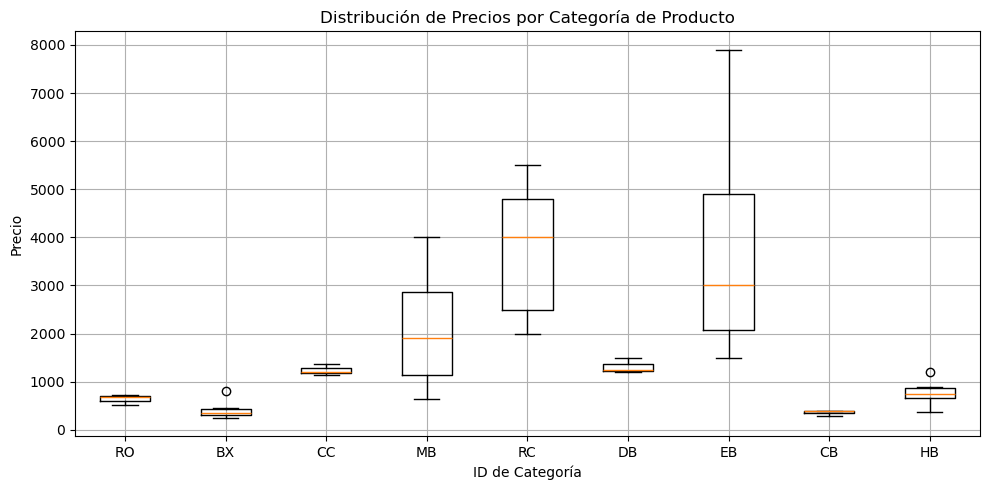

In [37]:
categorias = raw_productos['PRODCATEGORYID'].unique()
precios_por_categoria = [raw_productos[raw_productos['PRODCATEGORYID'] == cat]['PRICE'] for cat in categorias]

plt.figure(figsize=(10, 5))
plt.boxplot(precios_por_categoria, labels=categorias)
plt.title('Distribución de Precios por Categoría de Producto')
plt.xlabel('ID de Categoría')
plt.ylabel('Precio')
plt.grid(True)
plt.tight_layout()
plt.show()

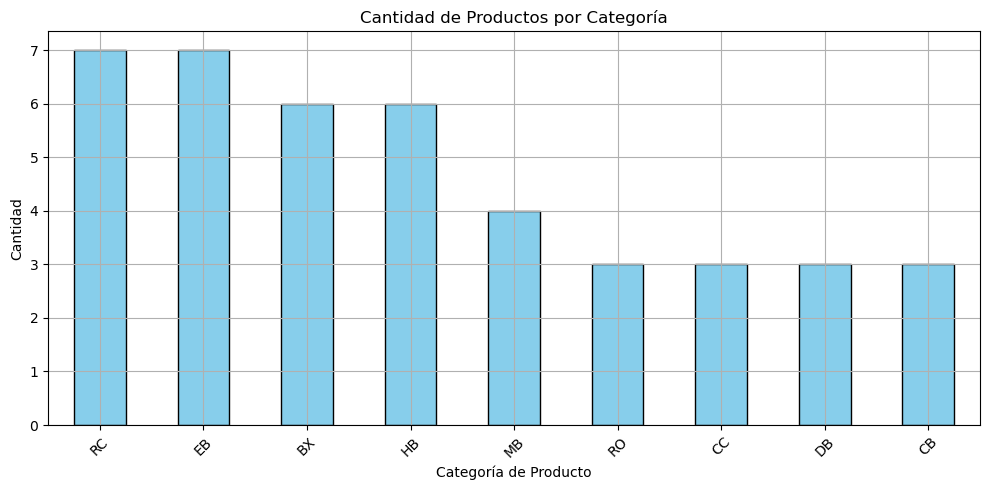

In [22]:
conteo_categorias = raw_productos['PRODCATEGORYID'].value_counts()
plt.figure(figsize=(10, 5))
conteo_categorias.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de Productos por Categoría')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

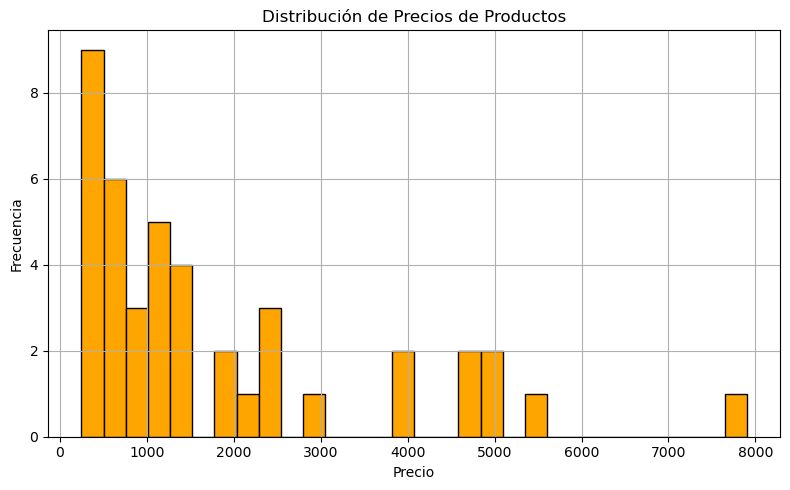

In [23]:
plt.figure(figsize=(8, 5))
plt.hist(raw_productos['PRICE'], bins=30, color='orange', edgecolor='black')
plt.title('Distribución de Precios de Productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

Las columnas clave en esta tabla son PRODUCTID, PRODCATEGORYID y PRICE.
Estas permiten:

Asociar cada producto a una categoría para análisis agregados (ventas por categoría).

Incorporar el precio base del producto para calcular márgenes o ingresos.

Vincular con otras tablas como Ordenes de Venta por Item para construir una vista unificada de ventas, inventario y comportamiento del producto.

## Texto Productos

In [24]:
eda(raw_texto_productos, "raw_texto_productos", "PRODUCTID")

EDA de raw_texto_productos 

Primeras filas:
  PRODUCTID LANGUAGE       SHORT_DESCR MEDIUM_DESCR  LONG_DESCR
0   RO-1001       EN        Roady 1001          NaN         NaN
1   RO-1002       EN        Roady 1002          NaN         NaN
2   RO-1003       EN        Roady 1003          NaN         NaN
3   BX-1011       EN  BMX Vintage 1011          NaN         NaN
4   BX-1012       EN     BMX Jump 1012          NaN         NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRODUCTID     44 non-null     object 
 1   LANGUAGE      44 non-null     object 
 2   SHORT_DESCR   44 non-null     object 
 3   MEDIUM_DESCR  36 non-null     object 
 4   LONG_DESCR    0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 1.8+ KB
None

Filas enteras repeditas: 0

Filas con id repetido: 2

Valores ausentes:
PRODUCTID        0
LANGUAGE         0

Esta tabla contiene descripciones de productos (PRODUCTNAME) y el idioma (LANGU).
Al igual que Text Category Products, su función principal es informativa para enriquecer una tabla dimensional o reportes visuales, pero no contiene datos numéricos ni permite análisis estadístico o visualizaciones relevantes.

## Conclusiones Generales

1. Selección y descarte de tablas
Se descartaron las tablas raw_direcciones y raw_socios por no tener relación con el objetivo de predicción de ventas e inventario.

También se excluyeron raw_categoria_productos y raw_orden_ventas, ya que su información es redundante o está a un nivel muy general.

Se seleccionaron las tablas clave:

raw_orden_ventas_item

raw_productos

raw_texto_productos

raw_texto_categoria_productos
Estas contienen las variables necesarias como cantidades, fechas, precios y descripciones.

2. Análisis de la tabla raw_orden_ventas_item
Variables clave: PRODUCTID, GROSSAMOUNT (precio unitario), QUANTITY, DELIVERYDATE.

Se generaron estadísticas descriptivas y visualizaciones (histogramas, boxplots, scatter plots) que muestran:

Distribuciones normales y patrones de agrupamiento en los precios.

Relación directa entre cantidad y precio unitario.

Estas variables permitirán construir tablas de hechos para el modelado y la predicción de demanda.

3. Análisis de la tabla raw_productos
Variables importantes: PRODUCTID, PRODCATEGORYID, PRICE.

Se observaron precios discretos con repeticiones consistentes.

Se generaron gráficos de distribución de precios y boxplots por categoría, lo cual permitirá evaluar diferencias entre grupos de productos y facilitar futuras segmentaciones.

4. Tablas raw_texto_productos y raw_texto_categoria_productos
Ambas contienen información descriptiva útil para enriquecer visualizaciones o construir tablas dimensionales.

No aportan datos numéricos ni permitieron generar visualizaciones relevantes dentro del EDA.

Se utilizarán como soporte en el Wrangling para unir nombres legibles a los códigos de producto y categoría.

5. Observaciones adicionales
GROSSAMOUNT representa directamente el precio unitario (PRICE), por lo que no requiere derivación adicional.

No se detectaron outliers evidentes en los precios, pero se recomienda validar consistencia entre productos y precios en fases posteriores.